# NATIONAL IDENTITY MANAGEMENT SYSTEM (NIMC)
###      FEDERAL REPUBLIC OF NIGERIA

#### Card Tempering Detector

#### The Purpose of this project is to detect tempering NIMC card using Computer Vision. This project will help different organization in detecting whether the i.d. that is the NIMC card provided ir original or no

##### For this Project i will calculate the structural similarity of original NIMC card and the NIMC card uploaded by the agent

In [2]:
#importing the neccesary packages
from skimage.metrics import structural_similarity #For checking the Similarity index
import imutils #For drawing the countours
import cv2 #For image preprocessing
from PIL import Image #For downloading the image and Visualizing
import requests #is using to patch the data from URL

###### Let's create two directory to store our image

In [9]:
!mkdir card__tempering

In [7]:
#Open Image and Display
original = Image.open("original.jpg")
tempered = Image.open("tempered.jpg")

###### Loading the original Image and User provided image

In [8]:
#The file format of the source file
print("Original Image format : ",original.format)
print("Tempered Image format : ",tempered.format)
#Image size, in pixels. The size is given as a 2-tuple (weight,height)
print("The original image size :",original.size)
print("The tempered image size :",tempered.size)

Original Image format :  JPEG
Tempered Image format :  JPEG
The original image size : (250, 160)
The tempered image size : (250, 160)


###### Converting the format of tempered image similar to original image

In [12]:
#Resize image
original = original.resize((250,160))
print(original.size)
original.save("card__tempering/image/original.jpg")#Save Image
tempered = tempered.resize((250,160))
print(tempered.size)
tempered.save("card__tempering/image/tempered.jpg")#Save Image

(250, 160)
(250, 160)


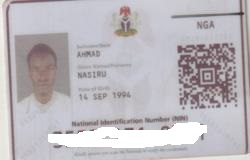

In [13]:
#Display Original Image
original

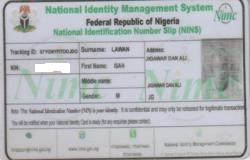

In [14]:
#Display Tempered
tempered# The user provided image

###### Load the two image using CV2

In [13]:
original = cv2.imread("card__tempering/image/original.jpg")
tempered = cv2.imread("card__tempering/image/tempered.jpg")

###### Converting the colour image into Gray Scale


###### Converting image into gray scale using opencv. Because in image processing many applications does'nt help us in identifying the important, edge of the coloured image also coloured image are bit complex to understand by machine because they have 3 channel while grayscale has only one channel

In [14]:
original_gray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tempered_gray = cv2.cvtColor(tempered,cv2.COLOR_BGR2GRAY)

##### Compute the Similarity Score

###### Structural Similarity index help us to determine exactly where in terms of x,y coordinate location,the image differences are. Here i am trying to find the similarities between the original and tempered image. The Lower the SSIM score lower is the similarity

In [28]:
(score,diff) = structural_similarity(original_gray,tempered_gray,full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.1874264149317716


##### Calculating Countours and Threshold

##### Here i'm using the thrshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This Function transforms the grayscale image into binary image using mathematical formula
##### Find Contours works on binary image and retrieve the contours.This contours are a usefull tool for shape analysis and recognition. Grab the appropriate value of the contours

In [29]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

###### Drawing The Bounding Rectangles

###### Boumding Rectangles helps in finding the ratio of width to height of bounding retangles of the object. We compute the bounding box of the countour and the draw the bounding box on both input images to represent where the two image are different or not

In [31]:
#Loop over the contours
for c in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.rectangle(tempered,(x,y),(x+w,y+h),(0,0,255),2)

In [5]:
#Display the original image with contour
print("Original Format Image")
#Image.fromarray(original)

Original Format Image


In [6]:
#Display the tempered image with contour
print("Tempered Format Image")
#Image.fromarray(tempered)

Tempered Format Image


Different Image


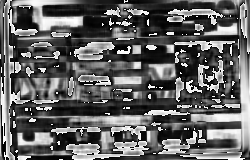

In [34]:
#Display differences image with black
print("Different Image")
Image.fromarray(diff)

Threshold Image


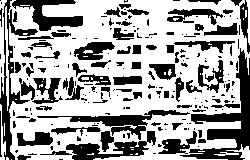

In [35]:
#Display threshold image with white
print("Threshold Image")
Image.fromarray(thresh)